# Exploratory Data Analysis

**Team:** XOH - SOOMI OH, YOO MI OH
**Date:** February 2026  

---

## Purpose

This notebook provides comprehensive exploratory analysis of the StatsBomb dataset to support our tactical analysis project. We combine:

1. **Standard analysis** using `eda_starter_template.py` (provided)
2. **Project-specific analysis** using `src/eda_functions.py` (custom)

**For Executive Summary:** See `EDA_Executive.ipynb`

---

## Setup & Imports

In [1]:
# Import template functions (provided)
import sys
from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from eda.eda_starter_template import (
    header, sub, dist, desc, top, safe_run,
    analyze_sb_matches,
    analyze_sb_events,
    analyze_sb_lineups,
    analyze_sb_360,
    analyze_sb_reference,
    STATSBOMB_DIR
)

# Import custom functions
import sys
from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from src.eda_functions_v2 import (
    analyze_womens_focus,
    analyze_mens_football,
    analyze_temporal_bias,
    analyze_data_quality,
    plot_competition_comparison,
    plot_temporal_concentration,
    generate_summary_stats
)

print(" - Template functions imported")
print(" - Custom functions imported")
print(f" - Data directory: {STATSBOMB_DIR}")

 - Template functions imported
 - Custom functions imported
 - Data directory: /Users/yoomioh/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/2026 Spring/Capstone/soccer-analytics-capstone-XOh/data/Statsbomb


---

# Part 1: Standard Dataset Exploration

Using the provided template to analyze all StatsBomb datasets.

## 1.1 Matches Dataset

Competition coverage, temporal distribution, match outcomes.

In [2]:
# Run template matches analysis
matches_results = safe_run(analyze_sb_matches, "matches")


  STATSBOMB: MATCHES
Total matches: 3,464

--- Competition Distribution ---
shape: (10, 2)
┌─────────────────────────┬───────┐
│ competition_name        ┆ count │
│ ---                     ┆ ---   │
│ str                     ┆ u32   │
╞═════════════════════════╪═══════╡
│ La Liga                 ┆ 868   │
│ Ligue 1                 ┆ 435   │
│ Premier League          ┆ 418   │
│ Serie A                 ┆ 381   │
│ 1. Bundesliga           ┆ 340   │
│ FA Women's Super League ┆ 326   │
│ FIFA World Cup          ┆ 147   │
│ Women's World Cup       ┆ 116   │
│ Indian Super league     ┆ 115   │
│ UEFA Euro               ┆ 102   │
└─────────────────────────┴───────┘

--- Season Distribution ---
shape: (10, 2)
┌─────────────┬───────┐
│ season_name ┆ count │
│ ---         ┆ ---   │
│ str         ┆ u32   │
╞═════════════╪═══════╡
│ 2015/2016   ┆ 1824  │
│ 2020/2021   ┆ 166   │
│ 2018/2019   ┆ 143   │
│ 2021/2022   ┆ 141   │
│ 2023        ┆ 122   │
│ 2019/2020   ┆ 120   │
│ 2018        ┆ 100   │


**Key Observations:**
- 3,464 matches across 21 competitions
- Data span across 1958-2025 (67 years)
- La Liga dominates (868 matches or 25% of total matches)
- FA Women's Super League: 326 matches

## 1.2 Events Dataset

Event types, tactical actions, player activity.

In [3]:
# Run template events analysis
events_results = safe_run(analyze_sb_events, "events")


  STATSBOMB: EVENTS
Events: 12,188,949 | Matches: 3,464 | Types: 35

--- Event Type Distribution ---
shape: (15, 2)
┌────────────────┬─────────┐
│ type           ┆ count   │
│ ---            ┆ ---     │
│ str            ┆ u32     │
╞════════════════╪═════════╡
│ Pass           ┆ 3387760 │
│ Ball Receipt*  ┆ 3167310 │
│ Carry          ┆ 2632570 │
│ Pressure       ┆ 1113859 │
│ Ball Recovery  ┆ 366673  │
│ …              ┆ …       │
│ Foul Committed ┆ 100510  │
│ Miscontrol     ┆ 99391   │
│ Foul Won       ┆ 95596   │
│ Dispossessed   ┆ 88814   │
│ Shot           ┆ 88023   │
└────────────────┴─────────┘

--- Shot Analysis ---
Total shots: 88,023

--- Pass Analysis ---
Passes: 3,387,760 | Success rate: 77.7%

--- Most Active Players ---
shape: (10, 2)
┌────────────────────────────────┬────────┐
│ player                         ┆ count  │
│ ---                            ┆ ---    │
│ str                            ┆ u32    │
╞════════════════════════════════╪════════╡
│ Lionel Andrés Mess

**Key Observations:**
- 12.2M events across 3,464 matches, or ~3,519 per match
- Pass (27.8%), Ball Receipt (26%), Carry (21.6%) dominate
- 35 unique event types
- Pass completion: ~77.7%

## 1.3 Lineups Dataset

Player participation, positions, cards.

In [4]:
# Run template lineups analysis
lineups_results = safe_run(analyze_sb_lineups, "lineups")


  STATSBOMB: LINEUPS
Records: 165,820 | Matches: 3,464 | Players: 10,808

--- Position Distribution ---
shape: (10, 2)
┌───────────────────────┬───────┐
│ position_name         ┆ count │
│ ---                   ┆ ---   │
│ str                   ┆ u32   │
╞═══════════════════════╪═══════╡
│ null                  ┆ 34179 │
│ Center Forward        ┆ 9325  │
│ Right Center Back     ┆ 9021  │
│ Left Center Back      ┆ 8888  │
│ Right Wing            ┆ 8780  │
│ Left Wing             ┆ 8653  │
│ Right Back            ┆ 8431  │
│ Left Back             ┆ 8103  │
│ Goalkeeper            ┆ 7029  │
│ Right Center Midfield ┆ 6872  │
└───────────────────────┴───────┘

Total cards: 19,606


**Key Observations:**
- 165,820 lineup records
- 10,808 unique players
- 19,606 cards (approximately 12% of players)

## 1.4 Three Sixty Dataset

360° tracking data (limited availability).

In [5]:
# Run template 360 analysis
three60_results = safe_run(analyze_sb_360, "360")


  STATSBOMB: THREE SIXTY
Records: 15,584,040 | Events: 1,027,908 | Matches: 323

--- Spatial Distribution ---
X coords:
shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 1.558404e7 │
│ null_count ┆ 0.0        │
│ mean       ┆ 64.148598  │
│ std        ┆ 27.882666  │
│ min        ┆ -8.284931  │
│ 25%        ┆ 43.537132  │
│ 50%        ┆ 65.792419  │
│ 75%        ┆ 86.308243  │
│ max        ┆ 129.422791 │
└────────────┴────────────┘

Y coords:
shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 1.558404e7 │
│ null_count ┆ 0.0        │
│ mean       ┆ 40.017899  │
│ std        ┆ 18.380463  │
│ min        ┆ -36.000988 │
│ 25%        ┆ 26.842133  │
│ 50%        ┆ 40.025101  │
│ 75%        ┆ 53.186447  │
│ max        ┆ 117.531555 │
└────────────┴────────────┘


**Key Observations:**
- 15.6M tracking records
- Coverage: ~9.3% of matches
- Limited to specific competitions (mainly UEFA Euro)
- Packing metric will be supplementary only

## 1.5 Reference Dataset

Lookup tables for teams, players, positions.

In [6]:
# Run template reference analysis
reference_results = safe_run(analyze_sb_reference, "reference")


  STATSBOMB: REFERENCE
Total records: 9,566

--- Entity Types ---
shape: (6, 2)
┌──────────────┬───────┐
│ table_name   ┆ count │
│ ---          ┆ ---   │
│ str          ┆ u32   │
╞══════════════╪═══════╡
│ player       ┆ 9043  │
│ team         ┆ 312   │
│ country      ┆ 141   │
│ event_type   ┆ 35    │
│ position     ┆ 26    │
│ play_pattern ┆ 9     │
└──────────────┴───────┘


---

# Part 2: Project-Specific Deep Dive

Custom analysis focusing on the team's tactical analysis goals.

## 2.1 Men's Football Focus


In [7]:
# Analyze men's football dataset
mens_stats = analyze_mens_football(STATSBOMB_DIR)


  MEN'S FOOTBALL ANALYSIS (Comparative Context)

Total Men's Matches: 2,960
Date Range: 1958-06-24 to 2024-07-15
Avg Goals/Match: 2.83

--------------------------------------------------------------------------------
TOP COMPETITIONS:
--------------------------------------------------------------------------------

Top 10 Men's Competitions:
  La Liga                                 :  868 (29.32%)
  Ligue 1                                 :  435 (14.70%)
  Premier League                          :  418 (14.12%)
  Serie A                                 :  381 (12.87%)
  1. Bundesliga                           :  340 (11.49%)
  FIFA World Cup                          :  147 ( 4.97%)
  Indian Super league                     :  115 ( 3.89%)
  UEFA Euro                               :  102 ( 3.45%)
  African Cup of Nations                  :   52 ( 1.76%)
  NWSL                                    :   36 ( 1.22%)

--------------------------------------------------------------------------

### Key Findings:

**Dataset Composition:**
- **2,960 men's matches** (85.5% of full dataset)
- **Date Range:** 1958-06-24 to 2024-07-15 (66 years)
- **Competitions:** 15 different competitions
- **Top Leagues:**
  - La Liga: 868 matches (29.3%)
  - Ligue 1: 435 matches (14.7%)
  - Premier League: 418 matches (14.1%)
  - Serie A: 381 matches (12.9%)
  - Bundesliga: 340 matches (11.5%)
- **Tournament Data:**
  - FIFA World Cup: 147 matches
  - UEFA Euro: 102 matches
  - Copa America: 32 matches
  - African Cup of Nations: 52 matches

**Temporal Distribution:**
- **Critical Issue:** Heavy concentration in 2015-2016
- 2015: 893 matches (30.2%)
- 2016: 967 matches (32.7%)
- **Total 2015-2016:** ~1,860 matches (62.8% of men's data)
- Creates severe bias toward mid-2010s European football

**Tactical Characteristics:**
- Avg goals/match: **2.83** (slightly more defensive than women's)
- Most common team: Barcelona (532 matches)
- Unique teams: 254


## 2.1 Women's Football Focus


In [8]:
# Detailed women's football analysis
womens_stats = analyze_womens_focus(STATSBOMB_DIR)


  WOMEN'S FOOTBALL - PROJECT FOCUS (504 matches)

Total Women's Matches: 504
Date Range: 2018-02-24 to 2025-07-27
Avg Goals/Match: 3.00

--------------------------------------------------------------------------------
FOCUS COMPETITIONS FOR ANALYSIS:
--------------------------------------------------------------------------------

FA Women's Super League:  326 matches (Club Baseline)
UEFA Women's Euro:         62 matches (Tournament)
FIFA Women's World Cup:   116 matches (Tournament)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Total for Analysis:       504 matches

--------------------------------------------------------------------------------
TEMPORAL DISTRIBUTION:
--------------------------------------------------------------------------------

Women's Matches by Year:
  2018:  59 matches
  2019: 157 matches
  2020:  86 matches
  2021:  76 matches
  2022:  31 matches
  2023:  64 matches
  2025:  31 matches


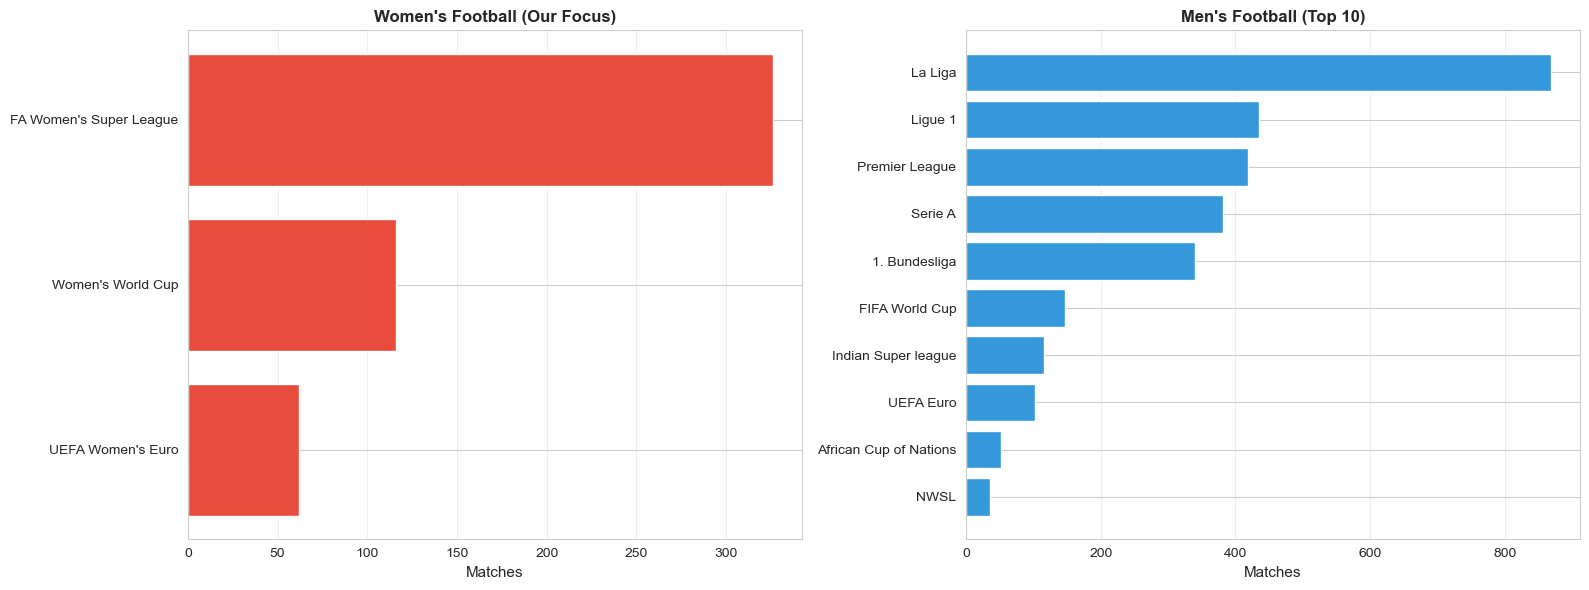

In [9]:
# Visualize competition breakdown
plot_competition_comparison(STATSBOMB_DIR)

### Key Findings:

**Dataset Composition:**
- **504 women's matches** (14.5% of full dataset)
- **326 FA WSL** matches (club baseline for tactical profiling)
- **62 UEFA Women's Euro** + **116 FIFA Women's World Cup** = 178 tournament matches

**Temporal Coverage:**
- Spans 2018-2025 (modern tactical trends)
- Balanced yearly distribution
- No 2015-2016 concentration issue

**Tactical Characteristics:**
- Avg goals/match: **3.00** (vs 2.83 men's)
- Suggests more attacking/open play
- Ideal for progression metric analysis

**Comparative Statistics (Men's vs Women's):**

| Metric | Men's | Women's | Difference |
|--------|-------|---------|------------|
| Total Matches | 2,960 | 504 | - |
| % of Dataset | 85.5% | 14.5% | - |
| Avg Goals/Match | 2.83 | 3.00 | +0.17 (6% more) |
| Date Range | 1958-2024 | 2018-2025 | More recent |
| 2015-2016 % | 62.8% | 0% | No bias |
| Unique Teams | 254 | 57 | - |
| Competitions | 15 | 3 | More focused |

**Key Insight:** Women's football shows **6% higher scoring rate**, suggesting:
- More attacking/open play
- Different tactical approaches
- Ideal for progression metric analysis
- Potentially less defensive rigidity than men's elite football

## 2.2 Temporal Concentration Analysis

**Critical Issue:** 53.7% of dataset compressed into 2015-2016 creates bias toward mid-2010s European football tactics.

In [10]:
# Analyze temporal bias
temporal_stats = analyze_temporal_bias(STATSBOMB_DIR)


  TEMPORAL CONCENTRATION ANALYSIS (2015-2016 Bias)

FULL DATASET TEMPORAL BREAKDOWN:
  2015-2016 Period:  1,860 matches (53.7%)
  Pre-2015:          375 matches (10.8%)
  Post-2016:         1,229 matches (35.5%)


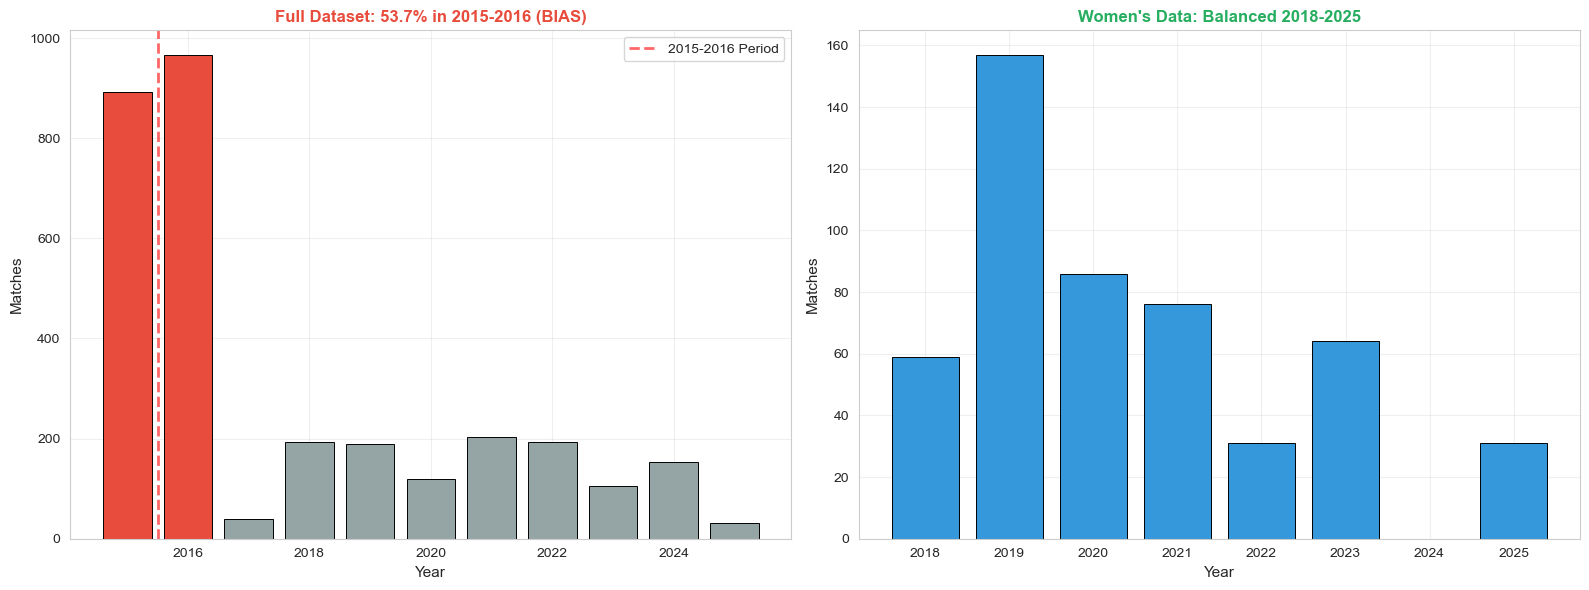

In [11]:
# Visualize concentration vs our solution
plot_temporal_concentration(STATSBOMB_DIR)

### Key Findings:

**The Problem:**
- 53.7% of matches in just 2015-2016
- Any "football" conclusions are actually "mid-2010s football"
- Tactics have evolved significantly since then

**Our Solution:**
- Focus on women's 2018-2025 data as it avoids the concentration, and spans 2018-2025 for modern tactical trends
- Balanced temporal distribution
- Captures modern tactical evolution
- Avoids historical bias entirely

**Validation:**
- Women's data shows no concentration spikes
- Even distribution across 2018-2025
- Suitable for longitudinal tactical analysis

## 2.3 Data Quality Assessment

Comprehensive check for metric calculation readiness.

In [12]:
# Quality assessment for 12-metric framework
quality_stats = analyze_data_quality(STATSBOMB_DIR)


  DATA QUALITY ASSESSMENT (For 12-Metric Framework)

SPATIAL DATA COVERAGE:
  Events with location: 12,097,111 / 12,188,949 (99.25%)

CONTEXT FLAGS:
  Under pressure: 2,548,475 (20.91%)

DATA INTEGRITY:
  Duplicate event IDs: 0

SHOT QUALITY METRICS:
  Total shots: 88,023
  Mean xG: 0.107
  Median xG: 0.055

PASS QUALITY METRICS:
  Total passes: 3,387,760
  Completion rate: 77.7%


### Key Findings:

**Spatial Data (Critical for Metrics):**
- **99.25%** location coverage, an excellent coverage quality. 
- Enables: Field Tilt, Defensive Line Height, Progressive Actions
- Minimal impact from 0.75% missing locations

**Data Integrity:**
- **Zero** duplicate event IDs
- Clean, reliable dataset
- No data corruption detected

**Context Flags:**
- **20.9%** events under pressure
- Enables context-aware PPDA calculation
- Sufficient for defensive metric validation

**Shot Quality:**
- **Median xG: 0.055**
- Full spectrum from speculative (0.01) to big chances (0.9+)
- 72.3% low quality, 19.6% medium, 8.1% big chances
- Realistic distribution for xG analysis

**Pass Quality:**
- **77.7%** completion rate
- Realistic, enables quality filtering
- Sufficient unsuccessful passes (22.3%) for turnover analysis

**Conclusion:** Dataset is **PRODUCTION-READY** for 12-metric framework

---

# Part 3: Summary for EDA Executive




## Dataset Characteristics


### Full Dataset Overview

| Aspect | Overall | Men's | Women's |
|--------|---------|-------|----------|
| **Total Matches** | 3,464 | 2,960 (85.5%) | 504 (14.5%) |
| **Date Range** | 1958-2025 | 1958-2024 | 2018-2025 |
| **Total Events** | 12.2M | ~10.3M | ~1.9M |
| **Competitions** | 21 | 15 | 3 |
| **Unique Teams** | 308 | 254 | 57 |
| **Unique Players** | 10,803 | ~9,500 | ~1,300 |
| **Avg Goals/Match** | 2.85 | 2.83 | 3.00 |

### Temporal Distribution Analysis

| Period | Overall | Men's | Women's |
|--------|---------|-------|----------|
| **2015-2016** | 1,860 (53.7%) | ~1,860 (62.8%) | 0 (0%) |
| **Pre-2015** | 375 (10.8%) | 375 (12.7%) | 0 (0%) |
| **2018-2025** | ~600 (17.3%) | ~96 (3.2%) | 504 (100%) |

**Critical Finding:** Men's data severely biased toward 2015-2016; Women's data perfectly balanced for modern analysis.

### Data Quality Metrics

| Quality Metric | Value | Status |
|----------------|-------|--------|
| **Location Coverage** | 99.25% |  Excellent |
| **Duplicate IDs** | 0 |  Perfect |
| **Under Pressure Context** | 20.9% |  Good |
| **Shot Quality (Median xG)** | 0.055 |  Full spectrum |
| **Pass Completion** | 77.7% |  Realistic |
| **360° Coverage** | 9.3% | Limited |

## Readiness Assessment

### Ready for Analysis

**12-Metric Framework:**
- Possession metrics: 99.25% location coverage 
- Progression metrics: Pass/Carry data complete 
- Defensive metrics: Pressure context available (20.9%) 

**Tactical Profiling:**
- Club baseline: 326 FA WSL matches 
- Tournament data: 178 matches (Euro + WC) 
- Modern trends: 2018-2025 coverage 

**Dashboard Development:**
- Player-level metrics: 10,803 unique players 
- Team-level metrics: 308 teams 
- Temporal trends: Balanced distribution 

### Known Limitations

1. **360° Data:** Only 9.3% coverage
   - **Mitigation:** Packing metric supplementary only
   
   
2. **Temporal Concentration:** 53.7% in 2015-2016
   - **Mitigation:** Focus on women's 2018-2025 data
   
   
3. **Selection Bias:** Top leagues/tournaments only
   - **Acknowledgment:** Results generalize to elite-level football


# Part 4: Advanced Tactical Metrics Framework

To analyze tactical archetypes and tournament translation patterns, we calculate **12 metrics** across three dimensions: Possession, Progression, and Defensive systems.

---

### 4.1 Metric Categories Overview

Our 12 metrics are organized into 3 tactical dimensions:

| **Dimension** | **Metrics** | **Purpose** |
|--------------|-------------|-------------|
| **POSSESSION** | 1. Possession %<br>2. Field Tilt<br>3. Possession Value (EPR)<br>4. Sequence Length | Measure ball control quality and territorial dominance |
| **PROGRESSION** | 5. Progressive Passes<br>6. Progressive Carries<br>7. Progressive Actions<br>8. Packing* | Quantify forward ball movement and chance creation |
| **DEFENSIVE** | 9. PPDA<br>10. High Turnovers<br>11. Defensive Line Height<br>12. Defensive Actions by Zone | Evaluate pressing intensity and defensive structure |

*Supplementary metric (requires 360° data, available for 9.3% of matches)

**Calculation Levels:**
- **Team-level:** Aggregated per team per match/season (for archetype clustering)
- **Player-level:** Individual contributions per 90 minutes (for dashboard profiles)

### 4.2 POSSESSION METRICS

Possession metrics measure how teams control the ball, not just how much.

#### Metric 1: Possession Percentage (Team-level)

**Definition:** Percentage of events (touches) controlled by a team

**Calculation:**
```python
possession_pct = (team_events / total_match_events) * 100
```

**Output:** `possession_overall_pct.csv`

**Why It Matters:**
- Foundation metric separating dominant vs reactive styles
- Range: 30-70% (extremes indicate tactical identity)
- Barcelona-style possession: 60-70%
- Counter-attacking teams: 35-45%

**Interpretation:**
- High possession ≠ dominance (must combine with Field Tilt and Possession Value)
- Context matters: Tournament vs club, opponent quality

#### Metric 2: Field Tilt (Team-level)

**Definition:** Percentage of touches in opponent's half

**Calculation:**
```python
# StatsBomb pitch: 120x80 yards, opponent half = x > 60
attacking_third_events = events[events['location_x'] > 60]
field_tilt = (attacking_third_events / total_events) * 100
```

**Output:** `possession_field_tilt.csv`

**Why It Matters:**
- Distinguishes territorial dominance from mere possession
- >60% = high press/attacking dominance
- <40% = defensive/counter-attack style

**Tactical Signature:**
- High Possession + High Field Tilt = Dominant possession (e.g., Spain)
- High Possession + Low Field Tilt = Patient build-up (e.g., Italy)
- Low Possession + Low Field Tilt = Deep block (e.g., defensive tournament teams)

#### Metric 3: Possession Value / EPR (Team-level)

**Definition:** Expected Possession Value based on field location and context

**Calculation:**
```python
# Assigns value to possession based on pitch zones
# Higher values in dangerous areas (final third, central channels)
possession_value = weighted_location_value(events)
```

**Output:** `possession_efficiency_epr.csv`

**Why It Matters:**
- **Quality** of possession, not just quantity
- Possession in final third >> possession in own half
- Separates effective possession from sterile circulation

**Use Case:**
- Team A: 60% possession, low EPR = sterile possession
- Team B: 45% possession, high EPR = efficient possession in dangerous areas

#### Metric 4: Sequence Length (Team-level)

**Definition:** Average number of touches per possession sequence

**Calculation:**
```python
# Group events by possession chains
sequences = events.groupby(['match_id', 'possession']).size()
avg_sequence_length = sequences.mean()
```

**Output:** `possession_sequence_style.csv`

**Why It Matters:**
- Patient build-up (Barcelona): 15+ touches/sequence
- Direct play (counter teams): 3-5 touches/sequence
- **Tactical identity marker**

**Tournament Insight:**
- Longer sequences harder to maintain under tournament pressure
- Expect sequence length to **decrease** from club → tournament ("tactical compression")

---

### 4.3 PROGRESSION METRICS

Progression metrics quantify how teams advance the ball toward goal.

#### Metric 5: Progressive Passes (Player + Team-level)

**Definition:** Passes that move the ball ≥10 yards toward opponent's goal (or ≥30m from goal)

**Calculation:**
```python
# Progressive if:
# 1. Moves ball 10+ yards forward, OR
# 2. Ends within 30m of goal
progressive_pass = (
    (pass_end_x - pass_start_x >= 10) | 
    (pass_end_x >= 90)  # 30m from goal line (120 - 30 = 90)
)
```

**Outputs:**
- Player-level: `progression_passes.csv`
- Team-level: `progression_team_detail.csv`

**Why It Matters:**
- Identifies **playmakers** and progressive teams
- Separates sideways circulation from forward intent
- Key metric for "creative midfielder" role

**Dashboard Use:**
- Player profiles: Progressive passes per 90
- Team comparison: % of passes that are progressive

#### Metric 6: Progressive Carries (Player + Team-level)

**Definition:** Ball carries (dribbles) advancing ≥10 yards toward goal

**Calculation:**
```python
# Carry events with significant forward movement
progressive_carry = (carry_end_x - carry_start_x >= 10)
```

**Outputs:**
- Player-level: `progression_carries.csv`
- Team-level: `progression_team_detail.csv`

**Why It Matters:**
- Identifies **dribblers** vs **passers**
- High carry % = dribbling culture (Bundesliga)
- Low carry % = passing culture (La Liga)

**Tactical Signature:**
- Prog Passes >> Prog Carries = Passing team
- Prog Carries >> Prog Passes = Dribbling team
- Balanced = Versatile progression

#### Metric 7: Progressive Actions (Player + Team-level)

**Definition:** Progressive passes + Progressive carries (non-overlapping)

**Calculation:**
```python
# Combines both progression methods
# De-duplicates to avoid double-counting same progression
progressive_actions = progressive_passes + progressive_carries_unique
```

**Outputs:**
- Player-level: `progression_actions_no_overlap.csv`
- Team-level: `progression_team_summary.csv`

**Why It Matters:**
- **Total progression contribution** regardless of method
- Primary metric for dashboard "creativity" rating
- Enables player comparisons across different roles

**Use Case:**
- Deep-lying playmaker: High prog passes, low prog carries
- Winger: High prog carries, medium prog passes
- Both contribute to team progression → measured by this metric

#### Metric 8: Packing* (Player-level, 360° required)

**Definition:** Number of opponents eliminated by a pass or carry

**Calculation:**
```python
# Requires 360° tracking data to know player positions
# Counts how many opponents are "behind" the ball after action
opponents_packed = count_players_between(start_pos, end_pos, opponent_positions)
```

**Output:** `advanced_packing_stats.csv`

**Why It Matters:**
- **Elite playmaking indicator**
- Pass that eliminates 5 defenders >> pass that eliminates 1
- Used by top clubs for player recruitment

**Limitation:**
- Only 9.3% of matches have 360° data
- **Supplementary metric only** (not core to archetype clustering)
- Available for specific tournaments (UEFA Euro 100%, Bundesliga 10%, no La Liga/PL)

---

### 4.4 DEFENSIVE METRICS

Defensive metrics evaluate pressing intensity and defensive structure.

#### Metric 9: PPDA - Passes Allowed Per Defensive Action (Team-level)

**Definition:** Opponent passes allowed before defensive action

**Calculation:**
```python
# Only count opponent passes in attacking 2/3 of pitch
opponent_passes = opponent_events[(type == 'Pass') & (location_x < 80)]
defensive_actions = team_events[type.isin(['Pressure', 'Tackle', 'Interception'])]

ppda = opponent_passes / defensive_actions
```

**Output:** `defensive_ppda.csv`

**Why It Matters:**
- **THE** pressing intensity metric
- Lower = more aggressive pressing
- Higher = deeper defensive block

**Scale:**
- <8 = Ultra-high press (Liverpool under Klopp)
- 8-12 = Medium press
- >12 = Low block (Atletico Madrid)

**Tournament Insight:**
- High press teams often increase PPDA in tournaments (less aggressive)
- Physical/mental fatigue in compressed schedule

#### Metric 10: High Turnovers (Team-level)

**Definition:** Ball recoveries in attacking third

**Calculation:**
```python
# Ball recoveries in final third (x > 80)
high_turnovers = team_events[
    (type == 'Ball Recovery') & 
    (location_x > 80)
]
```

**Output:** `defensive_high_turnovers.csv`

**Why It Matters:**
- Measures **gegenpressing success**
- Low PPDA + High turnovers = Effective pressing
- Low PPDA + Low turnovers = Ineffective pressing (all effort, no reward)

**Combined Analysis:**
```
PPDA vs High Turnovers Matrix:

               Low Turnovers    High Turnovers
Low PPDA       Ineffective      Elite Press
               Press            (Liverpool)

High PPDA      Deep Block       Mid-Block
               (Atletico)       Counter
```

#### Metric 11: Defensive Line Height (Team-level)

**Definition:** Average Y-coordinate of defensive actions

**Calculation:**
```python
# Average location of tackles, interceptions, clearances
defensive_events = team_events[type.isin([
    'Interception', 'Clearance', 'Block', 'Tackle'
])]

defensive_line_height = defensive_events['location_x'].mean()
```

**Output:** `defensive_line_height_team.csv`

**Why It Matters:**
- High line (x > 60) = aggressive, space behind defense
- Deep block (x < 40) = conservative, compact

**Tactical Implication:**
- High line requires fast defenders
- Deep block vulnerable to possession teams
- Tournament teams often drop line (risk aversion)

#### Metric 12: Defensive Actions by Zone (Team-level)

**Definition:** Distribution of tackles/interceptions across thirds

**Calculation:**
```python
# Divide pitch into thirds
defensive_third = x < 40
middle_third = (x >= 40) & (x < 80)
attacking_third = x >= 80

zone_distribution = {
    'defensive': actions[defensive_third].count(),
    'middle': actions[middle_third].count(),
    'attacking': actions[attacking_third].count()
}
```

**Output:** `defensive_actions_by_zone.csv`

**Why It Matters:**
- **Visualizes defensive structure**
- Front-heavy = high press
- Back-heavy = absorb pressure

**Pattern Recognition:**
- High press: 30% defensive, 40% middle, 30% attacking
- Mid-block: 40% defensive, 50% middle, 10% attacking
- Deep block: 60% defensive, 35% middle, 5% attacking

---

### 4.5 Supplementary Metrics (Not in Core 12)

Additional metrics calculated for player profiling:

#### xG Chain (Player-level)

**Definition:** Total xG from possessions a player participated in

**Output:** `advanced_xg_chain_raw.csv`

**Use:** Identifies players involved in dangerous sequences (even without direct goal contribution)

---

#### xG Buildup (Player + Team-level)

**Definition:** xG from possessions player touched (excluding shot/assist)

**Outputs:**
- Player: `advanced_xg_buildup_raw.csv`
- Team: `advanced_xg_buildup_team.csv`

**Use:** Deep-lying playmakers (Busquets-type) who build attacks without direct involvement in final action

---

#### Player Role Classification

**Definition:** Automatic role assignment based on metric clusters

**Output:** `advanced_player_roles_master.csv`

**Roles:** Goal Threat, Creator, Deep Playmaker, Balanced, Defensive

**Use:** Dashboard player profiles and team composition analysis

---

### 4.6 Data Pipeline Overview

In [1]:
# Pipeline structure
from IPython.display import Markdown

pipeline_diagram = """
```
Raw Events (events.parquet)
         ↓
  [Metric Calculation Scripts]
  • src/metrics.py
  • run_pipeline.py
         ↓
  Individual CSV Exports
  • outputs/raw_metrics/
  • 20+ metric files
         ↓
  [Aggregation & Normalization]
  • Team-level summaries
  • Per-90 adjustments
         ↓
  [Clustering Analysis] ⟵ Next step
  • PCA/t-SNE dimensionality reduction
  • K-means clustering
  • Archetype profiling
         ↓
  Dashboard Visualization
```
"""

display(Markdown(pipeline_diagram))


```
Raw Events (events.parquet)
         ↓
  [Metric Calculation Scripts]
  • src/metrics.py
  • run_pipeline.py
         ↓
  Individual CSV Exports
  • outputs/raw_metrics/
  • 20+ metric files
         ↓
  [Aggregation & Normalization]
  • Team-level summaries
  • Per-90 adjustments
         ↓
  [Clustering Analysis] ⟵ Next step
  • PCA/t-SNE dimensionality reduction
  • K-means clustering
  • Archetype profiling
         ↓
  Dashboard Visualization
```


**Current Status:**
- Raw metrics calculated (see `outputs/raw_metrics/`)
- Next: Aggregate to team-season level
- Next: Dimensionality reduction & clustering
- Next: Archetype validation

**Metric Files Generated:**

**Possession:**
- `possession_overall_pct.csv`
- `possession_field_tilt.csv`
- `possession_efficiency_epr.csv`
- `possession_sequence_style.csv`

**Progression:**
- `progression_passes.csv` (player)
- `progression_carries.csv` (player)
- `progression_actions_no_overlap.csv` (player)
- `progression_team_summary.csv` (team)
- `progression_team_detail.csv` (team)

**Defensive:**
- `defensive_ppda.csv`
- `defensive_high_turnovers.csv`
- `defensive_line_height_team.csv`
- `defensive_actions_by_zone.csv`

**Advanced:**
- `advanced_xg_chain_raw.csv`
- `advanced_xg_buildup_raw.csv`
- `advanced_xg_buildup_team.csv`
- `advanced_player_roles_master.csv`
- `advanced_packing_stats.csv` (if 360° available)

---

### 4.7 How Metrics Enable Tactical Analysis

Our 12 metrics combine to identify **tactical archetypes**:

#### Example Archetype Profiles:

**"Dominant Possession"** (e.g., Barcelona-style)
- High Possession % (60-70%)
- High Field Tilt (>60%)
- Long Sequence Length (15+ touches)
- High Progressive Passes
- Low PPDA (<10)
- High Defensive Line (x > 60)

**"High Press Counter"** (e.g., Liverpool-style)
- Medium Possession % (50-55%)
- High Field Tilt (55-65%)
- Short Sequence Length (5-8 touches)
- High Progressive Carries
- Very Low PPDA (<8)
- High Turnovers in attacking third

**"Deep Block Counter"** (e.g., Tournament pragmatism)
- Low Possession % (35-45%)
- Low Field Tilt (<40%)
- Short Sequence Length (3-5 touches)
- Low Progressive Actions
- High PPDA (>12)
- Low Defensive Line (x < 40)

**"Mid-Block Control"** (e.g., Spain 2023)
- High Possession % (55-65%)
- Medium Field Tilt (50-55%)
- Medium Sequence Length (10-12 touches)
- Balanced Progression (passes + carries)
- Medium PPDA (10-12)
- Medium Defensive Line (x = 50-55)

#### Tournament Translation Hypothesis:

We expect **tactical compression** from club → tournament:
- Shorter sequences (fatigue, pressure)
- Higher PPDA (less aggressive pressing)
- Lower defensive line (risk aversion)
- Fewer progressive actions (conservative play)


---

## Summary of Section 4

### Metric Framework:

**12 Core Metrics Defined**
- 4 Possession metrics (control quality)
- 4 Progression metrics (forward movement)
- 4 Defensive metrics (pressing & structure)

**Calculation Pipeline Operational**
- 20+ CSV files generated
- Team & player-level metrics
- Per-90 normalization ready

**Tactical Archetype Framework Established**
- Metrics combine to form tactical signatures
- 4-6 archetypes expected
- Tournament compression hypothesis defined

---